In [1]:
import sys
sys.path.append('..')

from src.utils.model import *
from src.utils.dataset import *
from src.utils.visualization import *

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Embedding Throughout Training

In [2]:
from src.utils.driver import *

In [ ]:
data_size = 1000
train_ratio = 0.8
seed=66
data_id = "permutation"
model_id = "H_MLP"

param_dict = {
    'seed': seed,
    'data_id': data_id,
    'data_size': data_size,
    'train_ratio': train_ratio,
    'model_id': model_id,
    'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    'embd_dim': 16,
    'video':True,
}

# Train the model
print(f"Training model with seed {seed}, data_id {data_id}, model_id {model_id}")
ret_dic = train_single_model(param_dict)

In [22]:
import moviepy.video.io.ImageSequenceClip

In [24]:
fps=15
image_folder='../video_imgs/'
num_arr = np.arange(0,7000, 10).astype(str) 
image_files = [image_folder + i + ".png" for i in num_arr]
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile('H_MLP_permutation.mp4')  # time to make 6s video: 40.8 s, 50s video: 31.5 

MoviePy - Building video H_MLP_permutation.mp4.
MoviePy - Writing video H_MLP_permutation.mp4



MoviePy - Done !
MoviePy - video ready H_MLP_permutation.mp4


In [ ]:
699/10

In [20]:
7000/60

116.66666666666667

## Transformer

### Training of H_transformer

In [79]:
from src.utils.driver import *
from src.utils.visualization import *

In [63]:
seed = 66
data_id = 'permutation'
model_id = 'H_transformer'
data_size = 1000
train_ratio = 0.8

In [64]:
param_dict = {
    'seed': seed,
    'data_id': data_id,
    'data_size': data_size,
    'train_ratio': train_ratio,
    'model_id': model_id,
    'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    'embd_dim': 16,
}

In [65]:
ret_dic = train_single_model(param_dict)

  1%|          | 49/7000 [00:10<23:08,  5.01it/s]

Epoch 50/7000, Train Loss: 3.1188, Train Acc: 0.0652, Test Loss: 3.4091, Test Acc: 0.0000


  1%|▏         | 99/7000 [00:20<23:02,  4.99it/s]

Epoch 100/7000, Train Loss: 2.9377, Train Acc: 0.1565, Test Loss: 3.5320, Test Acc: 0.0172


  2%|▏         | 149/7000 [00:31<22:57,  4.97it/s]

Epoch 150/7000, Train Loss: 2.8371, Train Acc: 0.1978, Test Loss: 3.5609, Test Acc: 0.0172


  3%|▎         | 199/7000 [00:41<23:37,  4.80it/s]

Epoch 200/7000, Train Loss: 2.8126, Train Acc: 0.2065, Test Loss: 3.4954, Test Acc: 0.0431


  4%|▎         | 249/7000 [00:51<22:23,  5.02it/s]

Epoch 250/7000, Train Loss: 2.7160, Train Acc: 0.2630, Test Loss: 3.5560, Test Acc: 0.0086


  4%|▍         | 299/7000 [01:02<24:01,  4.65it/s]

Epoch 300/7000, Train Loss: 2.6476, Train Acc: 0.2870, Test Loss: 3.5458, Test Acc: 0.0086


  5%|▍         | 349/7000 [01:12<22:18,  4.97it/s]

Epoch 350/7000, Train Loss: 2.6468, Train Acc: 0.2543, Test Loss: 3.5357, Test Acc: 0.0086


  6%|▌         | 399/7000 [01:23<25:01,  4.40it/s]

Epoch 400/7000, Train Loss: 2.5630, Train Acc: 0.3196, Test Loss: 3.4858, Test Acc: 0.0345


  6%|▋         | 449/7000 [01:33<21:39,  5.04it/s]

Epoch 450/7000, Train Loss: 2.5212, Train Acc: 0.3457, Test Loss: 3.6020, Test Acc: 0.0172


  7%|▋         | 499/7000 [01:43<21:17,  5.09it/s]

Epoch 500/7000, Train Loss: 2.4871, Train Acc: 0.3217, Test Loss: 3.5551, Test Acc: 0.0345


  8%|▊         | 549/7000 [01:53<23:08,  4.65it/s]

Epoch 550/7000, Train Loss: 2.4737, Train Acc: 0.3457, Test Loss: 3.5567, Test Acc: 0.0259


  9%|▊         | 599/7000 [02:04<21:25,  4.98it/s]

Epoch 600/7000, Train Loss: 2.4045, Train Acc: 0.3478, Test Loss: 3.5392, Test Acc: 0.0431


  9%|▉         | 649/7000 [02:15<21:09,  5.00it/s]

Epoch 650/7000, Train Loss: 2.3678, Train Acc: 0.3761, Test Loss: 3.5194, Test Acc: 0.0259


 10%|▉         | 699/7000 [02:25<21:45,  4.83it/s]

Epoch 700/7000, Train Loss: 2.3512, Train Acc: 0.3478, Test Loss: 3.5362, Test Acc: 0.0172


 11%|█         | 749/7000 [02:35<21:32,  4.84it/s]

Epoch 750/7000, Train Loss: 2.2930, Train Acc: 0.3978, Test Loss: 3.5297, Test Acc: 0.0172


 11%|█▏        | 799/7000 [02:45<21:59,  4.70it/s]

Epoch 800/7000, Train Loss: 2.2880, Train Acc: 0.3630, Test Loss: 3.4922, Test Acc: 0.0345


 12%|█▏        | 849/7000 [02:56<20:24,  5.02it/s]

Epoch 850/7000, Train Loss: 2.2788, Train Acc: 0.3543, Test Loss: 3.4496, Test Acc: 0.0259


 13%|█▎        | 899/7000 [03:07<27:00,  3.76it/s]

Epoch 900/7000, Train Loss: 2.2113, Train Acc: 0.3913, Test Loss: 3.4364, Test Acc: 0.0431


 14%|█▎        | 949/7000 [03:17<19:54,  5.07it/s]

Epoch 950/7000, Train Loss: 2.1628, Train Acc: 0.4174, Test Loss: 3.5320, Test Acc: 0.0345


 14%|█▍        | 999/7000 [03:27<19:39,  5.09it/s]

Epoch 1000/7000, Train Loss: 2.1601, Train Acc: 0.3978, Test Loss: 3.4162, Test Acc: 0.0086


 15%|█▍        | 1049/7000 [03:37<19:50,  5.00it/s]

Epoch 1050/7000, Train Loss: 2.0618, Train Acc: 0.4435, Test Loss: 3.4473, Test Acc: 0.0431


 16%|█▌        | 1099/7000 [03:47<19:31,  5.04it/s]

Epoch 1100/7000, Train Loss: 2.0788, Train Acc: 0.4413, Test Loss: 3.3966, Test Acc: 0.0259


 16%|█▋        | 1149/7000 [03:58<20:40,  4.72it/s]

Epoch 1150/7000, Train Loss: 2.0789, Train Acc: 0.4522, Test Loss: 3.4183, Test Acc: 0.0172


 17%|█▋        | 1199/7000 [04:08<21:00,  4.60it/s]

Epoch 1200/7000, Train Loss: 2.0621, Train Acc: 0.4804, Test Loss: 3.4565, Test Acc: 0.0345


 18%|█▊        | 1249/7000 [04:19<20:22,  4.71it/s]

Epoch 1250/7000, Train Loss: 2.0350, Train Acc: 0.4174, Test Loss: 3.3393, Test Acc: 0.0259


 19%|█▊        | 1299/7000 [04:30<19:51,  4.79it/s]

Epoch 1300/7000, Train Loss: 2.0217, Train Acc: 0.4348, Test Loss: 3.3165, Test Acc: 0.0172


 19%|█▉        | 1349/7000 [04:40<19:31,  4.83it/s]

Epoch 1350/7000, Train Loss: 1.9562, Train Acc: 0.4761, Test Loss: 3.3843, Test Acc: 0.0172


 20%|█▉        | 1399/7000 [04:50<19:04,  4.89it/s]

Epoch 1400/7000, Train Loss: 1.9910, Train Acc: 0.4565, Test Loss: 3.3097, Test Acc: 0.0603


 21%|██        | 1449/7000 [05:00<18:52,  4.90it/s]

Epoch 1450/7000, Train Loss: 1.9287, Train Acc: 0.5109, Test Loss: 3.3982, Test Acc: 0.0259


 21%|██▏       | 1499/7000 [05:11<18:12,  5.04it/s]

Epoch 1500/7000, Train Loss: 1.9296, Train Acc: 0.4783, Test Loss: 3.2954, Test Acc: 0.0431


 22%|██▏       | 1549/7000 [05:21<18:31,  4.90it/s]

Epoch 1550/7000, Train Loss: 1.9140, Train Acc: 0.4652, Test Loss: 3.1716, Test Acc: 0.0776


 23%|██▎       | 1599/7000 [05:31<18:47,  4.79it/s]

Epoch 1600/7000, Train Loss: 1.8908, Train Acc: 0.4935, Test Loss: 3.1833, Test Acc: 0.0345


 24%|██▎       | 1649/7000 [05:41<18:39,  4.78it/s]

Epoch 1650/7000, Train Loss: 1.8894, Train Acc: 0.4587, Test Loss: 3.1547, Test Acc: 0.0431


 24%|██▍       | 1699/7000 [05:51<19:17,  4.58it/s]

Epoch 1700/7000, Train Loss: 1.8033, Train Acc: 0.5217, Test Loss: 3.2169, Test Acc: 0.0086


 25%|██▍       | 1749/7000 [06:02<17:26,  5.02it/s]

Epoch 1750/7000, Train Loss: 1.8578, Train Acc: 0.4978, Test Loss: 3.1393, Test Acc: 0.0431


 26%|██▌       | 1799/7000 [06:12<17:56,  4.83it/s]

Epoch 1800/7000, Train Loss: 1.7921, Train Acc: 0.5283, Test Loss: 3.0099, Test Acc: 0.0776


 26%|██▋       | 1849/7000 [06:23<21:10,  4.05it/s]

Epoch 1850/7000, Train Loss: 1.7762, Train Acc: 0.5174, Test Loss: 2.9726, Test Acc: 0.0603


 27%|██▋       | 1899/7000 [06:34<17:05,  4.97it/s]

Epoch 1900/7000, Train Loss: 1.7292, Train Acc: 0.5370, Test Loss: 3.0291, Test Acc: 0.0517


 28%|██▊       | 1949/7000 [06:44<17:11,  4.89it/s]

Epoch 1950/7000, Train Loss: 1.6775, Train Acc: 0.5870, Test Loss: 2.9101, Test Acc: 0.0948


 29%|██▊       | 1999/7000 [06:55<16:44,  4.98it/s]

Epoch 2000/7000, Train Loss: 1.7368, Train Acc: 0.5370, Test Loss: 2.9791, Test Acc: 0.0776


 29%|██▉       | 2049/7000 [07:05<16:28,  5.01it/s]

Epoch 2050/7000, Train Loss: 1.7171, Train Acc: 0.5217, Test Loss: 2.9985, Test Acc: 0.0948


 30%|██▉       | 2099/7000 [07:15<16:24,  4.98it/s]

Epoch 2100/7000, Train Loss: 1.7091, Train Acc: 0.5413, Test Loss: 2.8140, Test Acc: 0.1293


 31%|███       | 2149/7000 [07:25<17:23,  4.65it/s]

Epoch 2150/7000, Train Loss: 1.6330, Train Acc: 0.5500, Test Loss: 2.8734, Test Acc: 0.1034


 31%|███▏      | 2199/7000 [07:36<16:18,  4.91it/s]

Epoch 2200/7000, Train Loss: 1.6469, Train Acc: 0.5500, Test Loss: 2.8534, Test Acc: 0.0517


 32%|███▏      | 2249/7000 [07:46<16:46,  4.72it/s]

Epoch 2250/7000, Train Loss: 1.5828, Train Acc: 0.5978, Test Loss: 2.7702, Test Acc: 0.0948


 33%|███▎      | 2299/7000 [07:56<16:17,  4.81it/s]

Epoch 2300/7000, Train Loss: 1.5738, Train Acc: 0.5717, Test Loss: 2.7815, Test Acc: 0.1034


 34%|███▎      | 2349/7000 [08:07<17:45,  4.37it/s]

Epoch 2350/7000, Train Loss: 1.6039, Train Acc: 0.5891, Test Loss: 2.8890, Test Acc: 0.0690


 34%|███▍      | 2399/7000 [08:17<15:37,  4.91it/s]

Epoch 2400/7000, Train Loss: 1.5821, Train Acc: 0.5478, Test Loss: 2.7903, Test Acc: 0.0948


 35%|███▍      | 2449/7000 [08:27<15:36,  4.86it/s]

Epoch 2450/7000, Train Loss: 1.5219, Train Acc: 0.6065, Test Loss: 2.5827, Test Acc: 0.1379


 36%|███▌      | 2499/7000 [08:38<15:30,  4.84it/s]

Epoch 2500/7000, Train Loss: 1.6043, Train Acc: 0.5500, Test Loss: 2.7432, Test Acc: 0.1034


 36%|███▋      | 2549/7000 [08:49<15:39,  4.74it/s]

Epoch 2550/7000, Train Loss: 1.5137, Train Acc: 0.5935, Test Loss: 2.5152, Test Acc: 0.1466


 37%|███▋      | 2599/7000 [08:59<16:54,  4.34it/s]

Epoch 2600/7000, Train Loss: 1.4702, Train Acc: 0.5913, Test Loss: 2.6613, Test Acc: 0.1293


 38%|███▊      | 2649/7000 [09:11<15:25,  4.70it/s]

Epoch 2650/7000, Train Loss: 1.5068, Train Acc: 0.5891, Test Loss: 2.3900, Test Acc: 0.1724


 39%|███▊      | 2699/7000 [09:21<14:57,  4.79it/s]

Epoch 2700/7000, Train Loss: 1.4869, Train Acc: 0.5935, Test Loss: 2.3745, Test Acc: 0.1897


 39%|███▉      | 2749/7000 [09:32<14:43,  4.81it/s]

Epoch 2750/7000, Train Loss: 1.4176, Train Acc: 0.6217, Test Loss: 2.3583, Test Acc: 0.1983


 40%|███▉      | 2799/7000 [09:43<18:44,  3.74it/s]

Epoch 2800/7000, Train Loss: 1.4308, Train Acc: 0.5913, Test Loss: 2.3223, Test Acc: 0.1724


 41%|████      | 2849/7000 [09:54<14:02,  4.93it/s]

Epoch 2850/7000, Train Loss: 1.3399, Train Acc: 0.6413, Test Loss: 2.3090, Test Acc: 0.1638


 41%|████▏     | 2899/7000 [10:04<13:31,  5.05it/s]

Epoch 2900/7000, Train Loss: 1.4179, Train Acc: 0.6022, Test Loss: 2.2762, Test Acc: 0.2586


 42%|████▏     | 2949/7000 [10:16<14:01,  4.81it/s]

Epoch 2950/7000, Train Loss: 1.3073, Train Acc: 0.6587, Test Loss: 2.2303, Test Acc: 0.2241


 43%|████▎     | 2999/7000 [10:27<13:01,  5.12it/s]

Epoch 3000/7000, Train Loss: 1.4198, Train Acc: 0.5848, Test Loss: 2.1133, Test Acc: 0.2845


 44%|████▎     | 3049/7000 [10:39<14:43,  4.47it/s]

Epoch 3050/7000, Train Loss: 1.3135, Train Acc: 0.6717, Test Loss: 2.1423, Test Acc: 0.2155


 44%|████▍     | 3099/7000 [10:50<16:52,  3.85it/s]

Epoch 3100/7000, Train Loss: 1.2883, Train Acc: 0.6370, Test Loss: 2.0376, Test Acc: 0.2586


 45%|████▍     | 3149/7000 [11:01<12:47,  5.02it/s]

Epoch 3150/7000, Train Loss: 1.2957, Train Acc: 0.6500, Test Loss: 2.0033, Test Acc: 0.3190


 46%|████▌     | 3199/7000 [11:12<12:41,  4.99it/s]

Epoch 3200/7000, Train Loss: 1.2740, Train Acc: 0.6543, Test Loss: 2.0199, Test Acc: 0.2759


 46%|████▋     | 3249/7000 [11:23<14:02,  4.45it/s]

Epoch 3250/7000, Train Loss: 1.2634, Train Acc: 0.6761, Test Loss: 1.9052, Test Acc: 0.3362


 47%|████▋     | 3299/7000 [11:34<12:59,  4.75it/s]

Epoch 3300/7000, Train Loss: 1.1724, Train Acc: 0.7304, Test Loss: 2.0104, Test Acc: 0.3190


 48%|████▊     | 3349/7000 [11:45<13:04,  4.65it/s]

Epoch 3350/7000, Train Loss: 1.2248, Train Acc: 0.6957, Test Loss: 1.9242, Test Acc: 0.3448


 49%|████▊     | 3399/7000 [11:55<13:14,  4.53it/s]

Epoch 3400/7000, Train Loss: 1.1660, Train Acc: 0.7109, Test Loss: 1.7935, Test Acc: 0.4052


 49%|████▉     | 3449/7000 [12:08<15:38,  3.78it/s]

Epoch 3450/7000, Train Loss: 1.1456, Train Acc: 0.7370, Test Loss: 1.7793, Test Acc: 0.4138


 50%|████▉     | 3499/7000 [12:19<12:08,  4.81it/s]

Epoch 3500/7000, Train Loss: 1.2217, Train Acc: 0.6935, Test Loss: 1.7808, Test Acc: 0.4052


 51%|█████     | 3549/7000 [12:30<12:20,  4.66it/s]

Epoch 3550/7000, Train Loss: 1.0900, Train Acc: 0.7261, Test Loss: 1.7349, Test Acc: 0.4052


 51%|█████▏    | 3599/7000 [12:42<14:45,  3.84it/s]

Epoch 3600/7000, Train Loss: 1.1000, Train Acc: 0.7239, Test Loss: 1.6605, Test Acc: 0.4655


 52%|█████▏    | 3649/7000 [12:53<13:29,  4.14it/s]

Epoch 3650/7000, Train Loss: 1.0816, Train Acc: 0.7543, Test Loss: 1.6584, Test Acc: 0.4483


 53%|█████▎    | 3699/7000 [13:05<13:52,  3.97it/s]

Epoch 3700/7000, Train Loss: 1.0115, Train Acc: 0.7565, Test Loss: 1.8187, Test Acc: 0.3448


 54%|█████▎    | 3749/7000 [13:15<12:36,  4.30it/s]

Epoch 3750/7000, Train Loss: 1.0270, Train Acc: 0.7826, Test Loss: 1.7912, Test Acc: 0.3879


 54%|█████▍    | 3799/7000 [13:27<13:37,  3.92it/s]

Epoch 3800/7000, Train Loss: 0.9826, Train Acc: 0.7935, Test Loss: 1.5949, Test Acc: 0.4397


 55%|█████▍    | 3849/7000 [13:39<10:42,  4.90it/s]

Epoch 3850/7000, Train Loss: 1.0350, Train Acc: 0.7609, Test Loss: 1.6038, Test Acc: 0.5259


 56%|█████▌    | 3899/7000 [13:49<10:17,  5.02it/s]

Epoch 3900/7000, Train Loss: 0.9945, Train Acc: 0.7935, Test Loss: 1.6528, Test Acc: 0.4052


 56%|█████▋    | 3949/7000 [13:59<10:11,  4.99it/s]

Epoch 3950/7000, Train Loss: 0.9153, Train Acc: 0.8152, Test Loss: 1.5541, Test Acc: 0.4655


 57%|█████▋    | 3999/7000 [14:10<11:17,  4.43it/s]

Epoch 4000/7000, Train Loss: 1.0120, Train Acc: 0.7478, Test Loss: 1.5159, Test Acc: 0.4828


 58%|█████▊    | 4049/7000 [14:24<13:44,  3.58it/s]

Epoch 4050/7000, Train Loss: 0.8863, Train Acc: 0.8478, Test Loss: 1.3639, Test Acc: 0.6379


 59%|█████▊    | 4099/7000 [14:38<17:47,  2.72it/s]

Epoch 4100/7000, Train Loss: 0.9370, Train Acc: 0.8109, Test Loss: 1.3491, Test Acc: 0.5862


 59%|█████▉    | 4149/7000 [14:50<11:20,  4.19it/s]

Epoch 4150/7000, Train Loss: 0.9550, Train Acc: 0.7870, Test Loss: 1.5322, Test Acc: 0.5345


 60%|█████▉    | 4199/7000 [15:04<18:34,  2.51it/s]

Epoch 4200/7000, Train Loss: 0.9379, Train Acc: 0.8022, Test Loss: 1.3573, Test Acc: 0.5862


 61%|██████    | 4249/7000 [15:17<09:48,  4.68it/s]

Epoch 4250/7000, Train Loss: 0.8893, Train Acc: 0.8370, Test Loss: 1.3427, Test Acc: 0.5690


 61%|██████▏   | 4299/7000 [15:28<11:03,  4.07it/s]

Epoch 4300/7000, Train Loss: 0.8520, Train Acc: 0.8196, Test Loss: 1.4011, Test Acc: 0.5431


 62%|██████▏   | 4349/7000 [15:40<11:30,  3.84it/s]

Epoch 4350/7000, Train Loss: 0.8624, Train Acc: 0.8196, Test Loss: 1.4764, Test Acc: 0.5345


 63%|██████▎   | 4399/7000 [15:54<11:38,  3.73it/s]

Epoch 4400/7000, Train Loss: 0.9017, Train Acc: 0.8261, Test Loss: 1.3978, Test Acc: 0.6034


 64%|██████▎   | 4449/7000 [16:08<10:12,  4.16it/s]

Epoch 4450/7000, Train Loss: 0.8062, Train Acc: 0.8565, Test Loss: 1.2475, Test Acc: 0.6034


 64%|██████▍   | 4499/7000 [16:19<09:19,  4.47it/s]

Epoch 4500/7000, Train Loss: 0.8458, Train Acc: 0.8522, Test Loss: 1.4799, Test Acc: 0.5259


 65%|██████▍   | 4549/7000 [16:30<10:14,  3.99it/s]

Epoch 4550/7000, Train Loss: 0.8097, Train Acc: 0.8717, Test Loss: 1.1836, Test Acc: 0.6552


 66%|██████▌   | 4599/7000 [16:43<11:13,  3.57it/s]

Epoch 4600/7000, Train Loss: 0.8352, Train Acc: 0.8652, Test Loss: 1.3398, Test Acc: 0.5948


 66%|██████▋   | 4649/7000 [16:55<08:21,  4.68it/s]

Epoch 4650/7000, Train Loss: 0.8489, Train Acc: 0.8239, Test Loss: 1.3123, Test Acc: 0.5776


 67%|██████▋   | 4699/7000 [17:07<09:11,  4.17it/s]

Epoch 4700/7000, Train Loss: 0.8253, Train Acc: 0.8587, Test Loss: 1.3398, Test Acc: 0.5690


 68%|██████▊   | 4749/7000 [17:18<08:22,  4.48it/s]

Epoch 4750/7000, Train Loss: 0.8619, Train Acc: 0.8478, Test Loss: 1.1508, Test Acc: 0.6552


 69%|██████▊   | 4799/7000 [17:30<08:39,  4.24it/s]

Epoch 4800/7000, Train Loss: 0.8014, Train Acc: 0.8717, Test Loss: 1.2181, Test Acc: 0.6466


 69%|██████▉   | 4849/7000 [17:41<07:39,  4.68it/s]

Epoch 4850/7000, Train Loss: 0.7547, Train Acc: 0.8978, Test Loss: 1.2810, Test Acc: 0.5948


 70%|██████▉   | 4899/7000 [17:51<06:58,  5.02it/s]

Epoch 4900/7000, Train Loss: 0.8332, Train Acc: 0.8543, Test Loss: 1.1287, Test Acc: 0.7328


 71%|███████   | 4949/7000 [18:02<07:41,  4.45it/s]

Epoch 4950/7000, Train Loss: 0.7626, Train Acc: 0.8739, Test Loss: 1.1926, Test Acc: 0.6983


 71%|███████▏  | 4999/7000 [18:13<07:26,  4.48it/s]

Epoch 5000/7000, Train Loss: 0.7506, Train Acc: 0.8826, Test Loss: 1.1617, Test Acc: 0.7241


 72%|███████▏  | 5049/7000 [18:25<07:31,  4.32it/s]

Epoch 5050/7000, Train Loss: 0.7978, Train Acc: 0.8348, Test Loss: 1.0778, Test Acc: 0.7414


 73%|███████▎  | 5099/7000 [18:37<06:40,  4.74it/s]

Epoch 5100/7000, Train Loss: 0.8379, Train Acc: 0.8587, Test Loss: 1.0839, Test Acc: 0.7414


 74%|███████▎  | 5149/7000 [18:48<06:29,  4.75it/s]

Epoch 5150/7000, Train Loss: 0.7954, Train Acc: 0.8783, Test Loss: 1.1066, Test Acc: 0.7069


 74%|███████▍  | 5199/7000 [18:59<06:34,  4.57it/s]

Epoch 5200/7000, Train Loss: 0.6949, Train Acc: 0.9022, Test Loss: 1.1601, Test Acc: 0.6207


 75%|███████▍  | 5249/7000 [19:10<06:18,  4.63it/s]

Epoch 5250/7000, Train Loss: 0.7269, Train Acc: 0.8652, Test Loss: 1.1176, Test Acc: 0.7414


 76%|███████▌  | 5299/7000 [19:22<06:34,  4.32it/s]

Epoch 5300/7000, Train Loss: 0.7019, Train Acc: 0.9043, Test Loss: 1.0720, Test Acc: 0.7155


 76%|███████▋  | 5349/7000 [19:34<07:35,  3.62it/s]

Epoch 5350/7000, Train Loss: 0.7222, Train Acc: 0.8848, Test Loss: 1.1833, Test Acc: 0.6638


 77%|███████▋  | 5399/7000 [19:47<06:40,  3.99it/s]

Epoch 5400/7000, Train Loss: 0.7680, Train Acc: 0.8739, Test Loss: 1.1212, Test Acc: 0.7414


 78%|███████▊  | 5449/7000 [19:58<06:11,  4.18it/s]

Epoch 5450/7000, Train Loss: 0.7030, Train Acc: 0.9000, Test Loss: 1.0664, Test Acc: 0.7500


 79%|███████▊  | 5499/7000 [20:09<05:30,  4.54it/s]

Epoch 5500/7000, Train Loss: 0.7067, Train Acc: 0.8935, Test Loss: 1.0935, Test Acc: 0.7069


 79%|███████▉  | 5549/7000 [20:20<05:35,  4.33it/s]

Epoch 5550/7000, Train Loss: 0.7121, Train Acc: 0.8848, Test Loss: 0.9760, Test Acc: 0.7586


 80%|███████▉  | 5599/7000 [20:31<04:59,  4.68it/s]

Epoch 5600/7000, Train Loss: 0.6448, Train Acc: 0.9304, Test Loss: 1.0023, Test Acc: 0.7414


 81%|████████  | 5649/7000 [20:43<05:04,  4.44it/s]

Epoch 5650/7000, Train Loss: 0.6654, Train Acc: 0.9065, Test Loss: 1.0431, Test Acc: 0.7328


 81%|████████▏ | 5699/7000 [20:54<04:44,  4.57it/s]

Epoch 5700/7000, Train Loss: 0.7067, Train Acc: 0.8957, Test Loss: 0.9480, Test Acc: 0.7586


 82%|████████▏ | 5749/7000 [21:05<04:32,  4.59it/s]

Epoch 5750/7000, Train Loss: 0.7231, Train Acc: 0.8891, Test Loss: 1.0600, Test Acc: 0.7845


 83%|████████▎ | 5799/7000 [21:16<04:21,  4.60it/s]

Epoch 5800/7000, Train Loss: 0.6975, Train Acc: 0.8935, Test Loss: 1.1082, Test Acc: 0.6810


 84%|████████▎ | 5849/7000 [21:28<05:08,  3.73it/s]

Epoch 5850/7000, Train Loss: 0.6687, Train Acc: 0.8957, Test Loss: 0.9635, Test Acc: 0.8017


 84%|████████▍ | 5899/7000 [21:39<05:52,  3.13it/s]

Epoch 5900/7000, Train Loss: 0.7026, Train Acc: 0.8761, Test Loss: 1.0198, Test Acc: 0.7414


 85%|████████▍ | 5949/7000 [21:51<03:52,  4.52it/s]

Epoch 5950/7000, Train Loss: 0.7179, Train Acc: 0.9109, Test Loss: 0.9669, Test Acc: 0.7931


 86%|████████▌ | 5999/7000 [22:02<03:44,  4.46it/s]

Epoch 6000/7000, Train Loss: 0.6743, Train Acc: 0.8978, Test Loss: 0.9426, Test Acc: 0.7759


 86%|████████▋ | 6049/7000 [22:14<03:43,  4.25it/s]

Epoch 6050/7000, Train Loss: 0.6499, Train Acc: 0.9000, Test Loss: 0.8841, Test Acc: 0.8017


 87%|████████▋ | 6099/7000 [22:26<03:19,  4.51it/s]

Epoch 6100/7000, Train Loss: 0.6725, Train Acc: 0.9022, Test Loss: 0.8601, Test Acc: 0.7931


 88%|████████▊ | 6149/7000 [22:37<03:30,  4.04it/s]

Epoch 6150/7000, Train Loss: 0.6447, Train Acc: 0.9130, Test Loss: 0.9682, Test Acc: 0.7500


 89%|████████▊ | 6199/7000 [22:50<02:56,  4.54it/s]

Epoch 6200/7000, Train Loss: 0.6476, Train Acc: 0.9174, Test Loss: 0.8506, Test Acc: 0.7845


 89%|████████▉ | 6249/7000 [23:01<02:39,  4.72it/s]

Epoch 6250/7000, Train Loss: 0.6993, Train Acc: 0.8891, Test Loss: 0.9147, Test Acc: 0.7759


 90%|████████▉ | 6299/7000 [23:13<02:59,  3.92it/s]

Epoch 6300/7000, Train Loss: 0.6111, Train Acc: 0.9130, Test Loss: 0.8853, Test Acc: 0.8017


 91%|█████████ | 6349/7000 [23:24<02:19,  4.68it/s]

Epoch 6350/7000, Train Loss: 0.6701, Train Acc: 0.8957, Test Loss: 0.9448, Test Acc: 0.7931


 91%|█████████▏| 6399/7000 [23:37<02:34,  3.89it/s]

Epoch 6400/7000, Train Loss: 0.6467, Train Acc: 0.9000, Test Loss: 0.9530, Test Acc: 0.8017


 92%|█████████▏| 6449/7000 [23:49<02:40,  3.44it/s]

Epoch 6450/7000, Train Loss: 0.6543, Train Acc: 0.9196, Test Loss: 0.9188, Test Acc: 0.7845


 93%|█████████▎| 6499/7000 [24:05<02:27,  3.39it/s]

Epoch 6500/7000, Train Loss: 0.6090, Train Acc: 0.9152, Test Loss: 0.9408, Test Acc: 0.8103


 94%|█████████▎| 6549/7000 [24:16<01:42,  4.38it/s]

Epoch 6550/7000, Train Loss: 0.6622, Train Acc: 0.9022, Test Loss: 0.8799, Test Acc: 0.8190


 94%|█████████▍| 6599/7000 [24:27<01:42,  3.91it/s]

Epoch 6600/7000, Train Loss: 0.6139, Train Acc: 0.9174, Test Loss: 1.0480, Test Acc: 0.7759


 95%|█████████▍| 6649/7000 [24:39<01:28,  3.95it/s]

Epoch 6650/7000, Train Loss: 0.6558, Train Acc: 0.9000, Test Loss: 0.7198, Test Acc: 0.8448


 96%|█████████▌| 6699/7000 [24:50<01:03,  4.77it/s]

Epoch 6700/7000, Train Loss: 0.6917, Train Acc: 0.8826, Test Loss: 0.8301, Test Acc: 0.8017


 96%|█████████▋| 6749/7000 [25:01<01:02,  4.04it/s]

Epoch 6750/7000, Train Loss: 0.5802, Train Acc: 0.9413, Test Loss: 0.9196, Test Acc: 0.7931


 97%|█████████▋| 6799/7000 [25:15<00:54,  3.66it/s]

Epoch 6800/7000, Train Loss: 0.6351, Train Acc: 0.9087, Test Loss: 0.9005, Test Acc: 0.8017


 98%|█████████▊| 6849/7000 [25:26<00:32,  4.70it/s]

Epoch 6850/7000, Train Loss: 0.6016, Train Acc: 0.9130, Test Loss: 0.8482, Test Acc: 0.8276


 99%|█████████▊| 6899/7000 [25:37<00:21,  4.62it/s]

Epoch 6900/7000, Train Loss: 0.6067, Train Acc: 0.9239, Test Loss: 0.8267, Test Acc: 0.8362


 99%|█████████▉| 6949/7000 [25:48<00:10,  4.84it/s]

Epoch 6950/7000, Train Loss: 0.5998, Train Acc: 0.9304, Test Loss: 0.9841, Test Acc: 0.7155


100%|█████████▉| 6999/7000 [25:58<00:00,  3.66it/s]

Epoch 7000/7000, Train Loss: 0.5589, Train Acc: 0.9261, Test Loss: 0.7134, Test Acc: 0.8707


100%|██████████| 7000/7000 [25:59<00:00,  4.49it/s]


### continuing training

In [74]:
model = ret_dic['model']
dataset = ret_dic['dataset']

In [76]:
# greater weight decay to encourage better generalizaiton
batch_size = 32
train_dataset = ToyDataset(dataset['train_data_id'], dataset['train_label'])
test_dataset = ToyDataset(dataset['test_data_id'], dataset['test_label'])
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

ret_dic = {}
ret_dic["results"] = model.train(param_dict={'num_epochs': 3000, 'learning_rate': 0.001, 'train_dataloader': train_dataloader, 'test_dataloader': test_dataloader, 'device': 'cpu', 'weight_decay':0.05})
ret_dic["model"] = model
ret_dic["dataset"] = dataset


  2%|▏         | 49/3000 [00:06<05:49,  8.45it/s]

Epoch 50/3000, Train Loss: 0.4516, Train Acc: 0.9478, Test Loss: 0.5231, Test Acc: 0.9310


  3%|▎         | 99/3000 [00:11<05:27,  8.86it/s]

Epoch 100/3000, Train Loss: 0.4043, Train Acc: 0.9500, Test Loss: 0.5252, Test Acc: 0.9397


  5%|▍         | 149/3000 [00:20<05:55,  8.01it/s]

Epoch 150/3000, Train Loss: 0.3854, Train Acc: 0.9587, Test Loss: 0.5092, Test Acc: 0.9310


  7%|▋         | 199/3000 [00:26<05:47,  8.05it/s]

Epoch 200/3000, Train Loss: 0.3966, Train Acc: 0.9630, Test Loss: 0.5280, Test Acc: 0.9310


  8%|▊         | 249/3000 [00:32<06:26,  7.12it/s]

Epoch 250/3000, Train Loss: 0.3725, Train Acc: 0.9696, Test Loss: 0.4263, Test Acc: 0.9655


 10%|▉         | 299/3000 [00:39<06:24,  7.02it/s]

Epoch 300/3000, Train Loss: 0.3563, Train Acc: 0.9630, Test Loss: 0.4660, Test Acc: 0.9483


 12%|█▏        | 349/3000 [00:46<05:54,  7.47it/s]

Epoch 350/3000, Train Loss: 0.3985, Train Acc: 0.9609, Test Loss: 0.5149, Test Acc: 0.9310


 13%|█▎        | 399/3000 [00:52<05:58,  7.26it/s]

Epoch 400/3000, Train Loss: 0.4141, Train Acc: 0.9543, Test Loss: 0.5126, Test Acc: 0.9310


 15%|█▍        | 449/3000 [01:00<05:01,  8.45it/s]

Epoch 450/3000, Train Loss: 0.4457, Train Acc: 0.9543, Test Loss: 0.4857, Test Acc: 0.9483


 17%|█▋        | 499/3000 [01:06<06:32,  6.38it/s]

Epoch 500/3000, Train Loss: 0.3936, Train Acc: 0.9674, Test Loss: 0.4493, Test Acc: 0.9655


 18%|█▊        | 549/3000 [01:12<04:42,  8.68it/s]

Epoch 550/3000, Train Loss: 0.4079, Train Acc: 0.9652, Test Loss: 0.5878, Test Acc: 0.9310


 20%|█▉        | 599/3000 [01:20<05:58,  6.69it/s]

Epoch 600/3000, Train Loss: 0.3918, Train Acc: 0.9783, Test Loss: 0.4602, Test Acc: 0.9655


 22%|██▏       | 649/3000 [01:27<05:53,  6.65it/s]

Epoch 650/3000, Train Loss: 0.4318, Train Acc: 0.9696, Test Loss: 0.5666, Test Acc: 0.9224


 23%|██▎       | 699/3000 [01:34<05:35,  6.87it/s]

Epoch 700/3000, Train Loss: 0.3829, Train Acc: 0.9696, Test Loss: 0.5894, Test Acc: 0.9138


 25%|██▍       | 749/3000 [01:43<05:17,  7.09it/s]

Epoch 750/3000, Train Loss: 0.3887, Train Acc: 0.9739, Test Loss: 0.5216, Test Acc: 0.9569


 27%|██▋       | 799/3000 [01:51<05:58,  6.14it/s]

Epoch 800/3000, Train Loss: 0.3932, Train Acc: 0.9609, Test Loss: 0.5454, Test Acc: 0.9310


 28%|██▊       | 849/3000 [01:58<04:56,  7.26it/s]

Epoch 850/3000, Train Loss: 0.4369, Train Acc: 0.9717, Test Loss: 0.5600, Test Acc: 0.9224


 30%|██▉       | 899/3000 [02:05<04:48,  7.29it/s]

Epoch 900/3000, Train Loss: 0.4398, Train Acc: 0.9652, Test Loss: 0.5372, Test Acc: 0.9310


 32%|███▏      | 949/3000 [02:13<04:44,  7.21it/s]

Epoch 950/3000, Train Loss: 0.4899, Train Acc: 0.9522, Test Loss: 0.5875, Test Acc: 0.9310


 33%|███▎      | 999/3000 [02:20<04:18,  7.74it/s]

Epoch 1000/3000, Train Loss: 0.4022, Train Acc: 0.9761, Test Loss: 0.5343, Test Acc: 0.9483


 35%|███▍      | 1049/3000 [02:27<04:20,  7.50it/s]

Epoch 1050/3000, Train Loss: 0.4406, Train Acc: 0.9630, Test Loss: 0.5019, Test Acc: 0.9483


 37%|███▋      | 1099/3000 [02:34<04:38,  6.81it/s]

Epoch 1100/3000, Train Loss: 0.4322, Train Acc: 0.9630, Test Loss: 0.4435, Test Acc: 0.9655


 38%|███▊      | 1149/3000 [02:42<03:57,  7.78it/s]

Epoch 1150/3000, Train Loss: 0.4299, Train Acc: 0.9543, Test Loss: 0.4593, Test Acc: 0.9569


 40%|███▉      | 1199/3000 [02:49<03:54,  7.67it/s]

Epoch 1200/3000, Train Loss: 0.4553, Train Acc: 0.9609, Test Loss: 0.5202, Test Acc: 0.9569


 42%|████▏     | 1249/3000 [02:55<04:25,  6.59it/s]

Epoch 1250/3000, Train Loss: 0.4378, Train Acc: 0.9674, Test Loss: 0.6283, Test Acc: 0.9397


 43%|████▎     | 1299/3000 [03:03<03:49,  7.40it/s]

Epoch 1300/3000, Train Loss: 0.4540, Train Acc: 0.9609, Test Loss: 0.5340, Test Acc: 0.9052


 45%|████▍     | 1349/3000 [03:10<03:32,  7.78it/s]

Epoch 1350/3000, Train Loss: 0.4163, Train Acc: 0.9783, Test Loss: 0.5430, Test Acc: 0.9397


 47%|████▋     | 1399/3000 [03:17<03:16,  8.17it/s]

Epoch 1400/3000, Train Loss: 0.4521, Train Acc: 0.9478, Test Loss: 0.5744, Test Acc: 0.9483


 48%|████▊     | 1449/3000 [03:23<03:30,  7.37it/s]

Epoch 1450/3000, Train Loss: 0.4818, Train Acc: 0.9543, Test Loss: 0.6707, Test Acc: 0.9224


 50%|████▉     | 1499/3000 [03:30<03:09,  7.93it/s]

Epoch 1500/3000, Train Loss: 0.4761, Train Acc: 0.9500, Test Loss: 0.5271, Test Acc: 0.9483


 52%|█████▏    | 1549/3000 [03:36<02:59,  8.06it/s]

Epoch 1550/3000, Train Loss: 0.4800, Train Acc: 0.9587, Test Loss: 0.5926, Test Acc: 0.9310


 53%|█████▎    | 1599/3000 [03:43<02:53,  8.07it/s]

Epoch 1600/3000, Train Loss: 0.4898, Train Acc: 0.9674, Test Loss: 0.5423, Test Acc: 0.9569


 55%|█████▍    | 1649/3000 [03:50<03:09,  7.14it/s]

Epoch 1650/3000, Train Loss: 0.4726, Train Acc: 0.9652, Test Loss: 0.5370, Test Acc: 0.9310


 57%|█████▋    | 1699/3000 [03:57<03:27,  6.28it/s]

Epoch 1700/3000, Train Loss: 0.4907, Train Acc: 0.9435, Test Loss: 0.5103, Test Acc: 0.9483


 58%|█████▊    | 1749/3000 [04:04<02:45,  7.55it/s]

Epoch 1750/3000, Train Loss: 0.4780, Train Acc: 0.9674, Test Loss: 0.5433, Test Acc: 0.9483


 60%|█████▉    | 1799/3000 [04:11<02:45,  7.24it/s]

Epoch 1800/3000, Train Loss: 0.4846, Train Acc: 0.9630, Test Loss: 0.5249, Test Acc: 0.9483


 62%|██████▏   | 1849/3000 [04:17<02:38,  7.26it/s]

Epoch 1850/3000, Train Loss: 0.4890, Train Acc: 0.9674, Test Loss: 0.5348, Test Acc: 0.9483


 63%|██████▎   | 1899/3000 [04:24<02:17,  7.99it/s]

Epoch 1900/3000, Train Loss: 0.5018, Train Acc: 0.9478, Test Loss: 0.5555, Test Acc: 0.9310


 65%|██████▍   | 1949/3000 [04:32<03:02,  5.76it/s]

Epoch 1950/3000, Train Loss: 0.4672, Train Acc: 0.9587, Test Loss: 0.5569, Test Acc: 0.9655


 67%|██████▋   | 1999/3000 [04:38<02:03,  8.13it/s]

Epoch 2000/3000, Train Loss: 0.4796, Train Acc: 0.9652, Test Loss: 0.5910, Test Acc: 0.9569


 68%|██████▊   | 2049/3000 [04:45<01:54,  8.31it/s]

Epoch 2050/3000, Train Loss: 0.5082, Train Acc: 0.9543, Test Loss: 0.6111, Test Acc: 0.9310


 70%|██████▉   | 2099/3000 [04:51<01:48,  8.28it/s]

Epoch 2100/3000, Train Loss: 0.4929, Train Acc: 0.9630, Test Loss: 0.5950, Test Acc: 0.9224


 72%|███████▏  | 2149/3000 [04:57<01:42,  8.29it/s]

Epoch 2150/3000, Train Loss: 0.4938, Train Acc: 0.9587, Test Loss: 0.5778, Test Acc: 0.9483


 73%|███████▎  | 2199/3000 [05:03<01:33,  8.55it/s]

Epoch 2200/3000, Train Loss: 0.4944, Train Acc: 0.9783, Test Loss: 0.6095, Test Acc: 0.9655


 75%|███████▍  | 2249/3000 [05:09<01:46,  7.06it/s]

Epoch 2250/3000, Train Loss: 0.5315, Train Acc: 0.9565, Test Loss: 0.6093, Test Acc: 0.8879


 77%|███████▋  | 2299/3000 [05:16<01:35,  7.37it/s]

Epoch 2300/3000, Train Loss: 0.5144, Train Acc: 0.9565, Test Loss: 0.4900, Test Acc: 0.9828


 78%|███████▊  | 2349/3000 [05:22<01:12,  8.96it/s]

Epoch 2350/3000, Train Loss: 0.5489, Train Acc: 0.9326, Test Loss: 0.6087, Test Acc: 0.9569


 80%|███████▉  | 2399/3000 [05:28<01:07,  8.91it/s]

Epoch 2400/3000, Train Loss: 0.5245, Train Acc: 0.9587, Test Loss: 0.6203, Test Acc: 0.9483


 82%|████████▏ | 2449/3000 [05:34<01:02,  8.78it/s]

Epoch 2450/3000, Train Loss: 0.4864, Train Acc: 0.9587, Test Loss: 0.5449, Test Acc: 0.9569


 83%|████████▎ | 2499/3000 [05:40<01:00,  8.26it/s]

Epoch 2500/3000, Train Loss: 0.5403, Train Acc: 0.9543, Test Loss: 0.6471, Test Acc: 0.9138


 85%|████████▍ | 2549/3000 [05:46<00:51,  8.82it/s]

Epoch 2550/3000, Train Loss: 0.4649, Train Acc: 0.9804, Test Loss: 0.5388, Test Acc: 0.9655


 87%|████████▋ | 2599/3000 [05:51<00:45,  8.77it/s]

Epoch 2600/3000, Train Loss: 0.5428, Train Acc: 0.9413, Test Loss: 0.5642, Test Acc: 0.9397


 88%|████████▊ | 2649/3000 [05:57<00:42,  8.25it/s]

Epoch 2650/3000, Train Loss: 0.5394, Train Acc: 0.9543, Test Loss: 0.6335, Test Acc: 0.9310


 90%|████████▉ | 2699/3000 [06:03<00:33,  8.89it/s]

Epoch 2700/3000, Train Loss: 0.4980, Train Acc: 0.9609, Test Loss: 0.5392, Test Acc: 0.9310


 92%|█████████▏| 2749/3000 [06:09<00:28,  8.87it/s]

Epoch 2750/3000, Train Loss: 0.5419, Train Acc: 0.9565, Test Loss: 0.6484, Test Acc: 0.9310


 93%|█████████▎| 2799/3000 [06:14<00:23,  8.63it/s]

Epoch 2800/3000, Train Loss: 0.4848, Train Acc: 0.9652, Test Loss: 0.6031, Test Acc: 0.9655


 95%|█████████▍| 2849/3000 [06:20<00:16,  8.90it/s]

Epoch 2850/3000, Train Loss: 0.5101, Train Acc: 0.9587, Test Loss: 0.6441, Test Acc: 0.9138


 97%|█████████▋| 2899/3000 [06:26<00:11,  8.56it/s]

Epoch 2900/3000, Train Loss: 0.5273, Train Acc: 0.9630, Test Loss: 0.5755, Test Acc: 0.9397


 98%|█████████▊| 2949/3000 [06:32<00:05,  8.91it/s]

Epoch 2950/3000, Train Loss: 0.5208, Train Acc: 0.9565, Test Loss: 0.6103, Test Acc: 0.9310


100%|█████████▉| 2999/3000 [06:38<00:00,  8.53it/s]

Epoch 3000/3000, Train Loss: 0.4982, Train Acc: 0.9696, Test Loss: 0.5552, Test Acc: 0.9138


100%|██████████| 3000/3000 [06:38<00:00,  7.53it/s]


In [77]:
torch.save(model.state_dict(), f"../results/{seed}_{data_id}_{model_id}_{data_size}_{train_ratio}.pt")

In [92]:
perms = list(itertools.permutations(range(4)))
perm_dict = dict(enumerate(perms))
perm_vals = ["".join(np.array(perm_dict[i]).astype(str)) for i in range(len(perm_dict))]
new_perm_dict = dict(zip(perm_dict.keys(), perm_vals))

In [94]:
def assign_colors_to_permutations(p, dict_level):
    # Generate all permutations of {0, 1, ..., p-1}
    perms = list(itertools.permutations(range(p)))
    
    # Map each permutation to its corresponding coset index from dict_level
    coset_indices = {key: None for key in dict_level.keys()}
    for key, perm in dict_level.items():
        coset_indices[key] = perms.index(tuple(map(int, perm)))
    
    # Generate a unique color for each coset
    unique_coset_indices = set(coset_indices.values())
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_coset_indices)))
    
    # Assign colors to each permutation based on coset index
    coset_color_map = {index: colors[i] for i, index in enumerate(unique_coset_indices)}
    color_dict = {key: coset_color_map[coset_indices[key]] for key in dict_level.keys()}
    
    return color_dict


In [95]:
color_dict = assign_colors_to_permutations(4,new_perm_dict)

In [96]:
color_dict

{0: array([0.5, 0. , 1. , 1. ]),
 1: array([0.41372549, 0.13510525, 0.99770518, 1.        ]),
 2: array([0.32745098, 0.267733  , 0.99083125, 1.        ]),
 3: array([0.24117647, 0.39545121, 0.97940977, 1.        ]),
 4: array([0.15490196, 0.51591783, 0.96349314, 1.        ]),
 5: array([0.06862745, 0.62692381, 0.94315443, 1.        ]),
 6: array([0.01764706, 0.72643357, 0.91848699, 1.        ]),
 7: array([0.10392157, 0.81262237, 0.88960401, 1.        ]),
 8: array([0.19803922, 0.88960401, 0.8534438 , 1.        ]),
 9: array([0.28431373, 0.94315443, 0.81619691, 1.        ]),
 10: array([0.37058824, 0.97940977, 0.77520398, 1.        ]),
 11: array([0.45686275, 0.99770518, 0.73065313, 1.        ]),
 12: array([0.54313725, 0.99770518, 0.68274886, 1.        ]),
 13: array([0.62941176, 0.97940977, 0.63171101, 1.        ]),
 14: array([0.71568627, 0.94315443, 0.57777383, 1.        ]),
 15: array([0.80196078, 0.88960401, 0.52118488, 1.        ]),
 16: array([0.89607843, 0.81262237, 0.45673264

Explained Variance Ratio [0.21218295 0.19918819]


C:\Users\u admin\AppData\Local\Temp\ipykernel_25944\2080016107.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(emb_pca[i, dim1], emb_pca[i, dim2], c=color_dict[i])


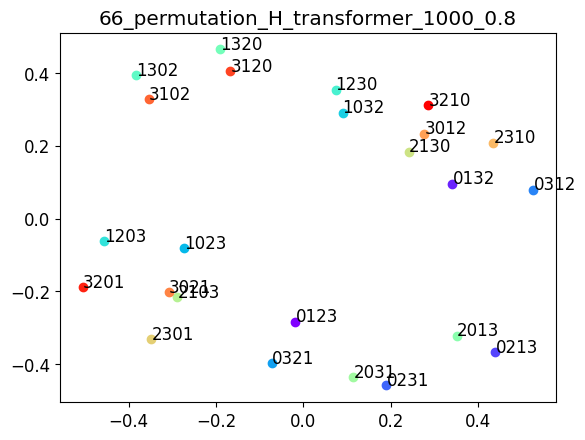

In [104]:
visualize_embedding(model.embedding.weight.cpu(), title=f"{seed}_{data_id}_{model_id}_{data_size}_{train_ratio}", save_path=f"../results/emb_{seed}_{data_id}_{model_id}_{data_size}_{train_ratio}.png", dict_level = new_perm_dict, color_dict=False)

## MLP

In [4]:
def choose_MLP_mode(seed, model_mode, input_token, embd_dim, vocab_size, device):
    if model_mode == 'ip':
        # ip model
        unembd = True
        weight_tied = True
        hidden_size = 100
        shp = [input_token * embd_dim, hidden_size, embd_dim, vocab_size]
        model = MLP(shp=shp, vocab_size=vocab_size, embd_dim=embd_dim, input_token=input_token, unembd=unembd, weight_tied=weight_tied, seed=seed).to(device)
    elif model_mode == 'hs3':
        weight_tied = True
        hidden_size = 100
        shp = [input_token * embd_dim, hidden_size, embd_dim, vocab_size]
        model = MLP_HS(shp=shp, vocab_size=vocab_size, embd_dim=embd_dim, input_token=input_token, weight_tied=weight_tied, seed=seed, n=1).to(device)
    elif model_mode == 'hs2':
        weight_tied = True
        hidden_size = 100
        shp = [input_token * embd_dim, hidden_size, embd_dim, vocab_size]
        model = MLP_HS(shp=shp, vocab_size=vocab_size, embd_dim=embd_dim, input_token=input_token, weight_tied=weight_tied, seed=seed, n=math.sqrt(embd_dim)).to(device)
    elif model_mode == 'hs1':
        weight_tied = True
        hidden_size = 100
        shp = [input_token * embd_dim, hidden_size, embd_dim, vocab_size]
        model = MLP_HS(shp=shp, vocab_size=vocab_size, embd_dim=embd_dim, input_token=input_token, weight_tied=weight_tied, seed=seed, n=embd_dim).to(device)
    elif model_mode == 'standard':
        unembd = False
        weight_tied = False
        hidden_size = 100
        shp = [input_token * embd_dim, hidden_size, hidden_size, vocab_size]
        #shp = [input_token * embd_dim, hidden_size, vocab_size]
        model = MLP(shp=shp, vocab_size=vocab_size, embd_dim=embd_dim, input_token=input_token, unembd=unembd, weight_tied=weight_tied, seed=seed).to(device)
    else:
        print('model_mode not recognized!')
    
    return model

In [5]:
def MLP_runs(seed_list, mode, batch_size=16, lr=0.001, wd=0.0,lamb= 0.1): # hs1 mode
    torch.set_default_tensor_type(torch.DoubleTensor)

    device = 'cpu'
    p = 4 # S4
    embd_dim = 10
    input_token = 2
    num_perms = 1 if p == 0 else np.prod([i for i in range(1,p+1)]) # factorial
    vocab_size = num_perms
    batch_size=batch_size
    learning_rate = lr
    weight_decay = wd
    lamb = lamb

    model_mode = mode

    models = []
    performance = []
    
    for i in seed_list:
        seed = i
        np.random.seed(seed)
        torch.manual_seed(seed)

        model = choose_MLP_mode(seed, model_mode, input_token, embd_dim, vocab_size, device)
        dataset = permutation_group_dataset(p=p, num=num_perms**2, seed=seed)
        dataset = split_dataset(dataset, train_ratio=0.8, seed=seed)

        num_epochs = 600
        train_dataset = ToyDataset(dataset['train_data_id'], dataset['train_label'])
        test_dataset = ToyDataset(dataset['test_data_id'], dataset['test_label'])

        train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

        param_dict = {'num_epochs': int(num_epochs), 'learning_rate': learning_rate, 'weight_decay': weight_decay, 'lambda': lamb,
                      'train_dataloader': train_dataloader, 'test_dataloader':test_dataloader,
                      'device': device}
        
        ret_dic = model.train(param_dict) # perhaps worth doing early stopping so it can fully train?
        models.append(model)
        performance.append(ret_dic)   
         
    return models, performance

In [ ]:
seed_list = [0,52,105,157,210,263,315,368,421,473,526,578,631,684,736,789,842,894,947,1000]
n=len(seed_list)
mode='hs1'
mlp_list, train_details = MLP_runs(seed_list, mode, batch_size=4, lr=0.001)

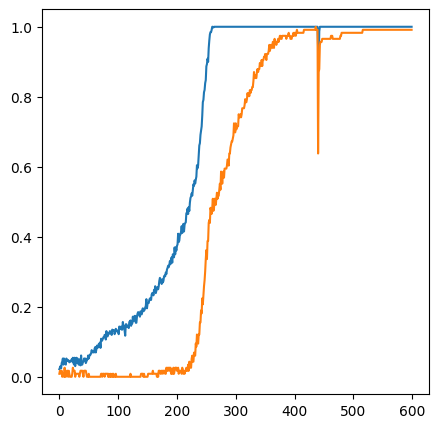

In [7]:
fig,axes = plt.subplots(n,1,figsize=(5, 5*n))
axes.plot(train_details[0]['train_accuracies'], label='train')
axes.plot(train_details[0]['test_accuracies'], label='test')

plt.show()

In [11]:
import matplotlib.ticker as ticker


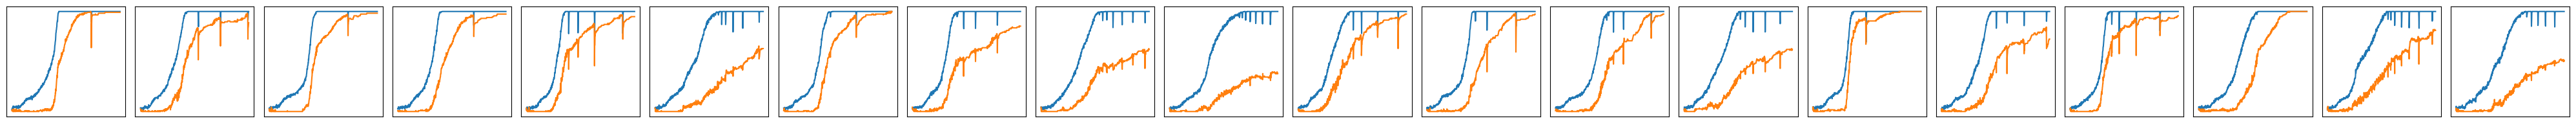

In [14]:
fig,axes = plt.subplots(1,n,figsize=(2*n,2))

for i, ax in enumerate(axes):
    ax.plot(train_details[i]['train_accuracies'], label='train')
    ax.plot(train_details[i]['test_accuracies'], label='test')
    ax.xaxis.set_major_locator(ticker.NullLocator())
    ax.yaxis.set_major_locator(ticker.NullLocator())
plt.tight_layout()
plt.show()

In [17]:
from adjustText import adjust_text

In [20]:
def permutation_visualization(model_list, n_comps):

    n = len(model_list)
    fig,axes = plt.subplots(1,n,figsize=(n*2,2))

    for i,ax in enumerate(axes):
        model=model_list[i]
        embd = model.embedding.cpu().detach().numpy()
        X = embd
        pca = PCA(n_components=n_comps) 
        pca.fit(X)
        embd_t = pca.fit_transform(X)

        dim1=0
        dim2= 1

        plt.scatter(embd_t[:,dim1], embd_t[:,dim2])

        perms = list(itertools.permutations(range(4)))
        perm_dict = dict(enumerate(perms))

        texts=[]
        x=[]
        y=[]

        for i in range(embd_t.shape[0]):
            texts.append(plt.text(embd_t[i,dim1], embd_t[i,dim2], "".join(np.array(perm_dict[i]).astype(str))))
            x.append(embd_t[i,dim1])
            y.append(embd_t[i,dim2])
        plt.title("MLP S4 (Harmonic)")
        adjust_text(texts, x=x, y=y, autoalign='xy', force_points=0, only_move = {'text':'xy'}, arrow_props=dict(arrowstyle="-->", color='b', lw=0.5))
    
    plt.show()

In [ ]:
permutation_visualization(mlp_list,n_comps=10)

In [ ]:
model=mlp_list[0]


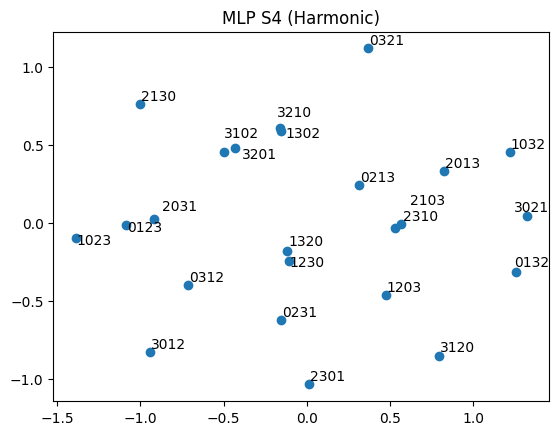

In [ ]:
embd = model.embedding.cpu().detach().numpy()
X = embd
pca = PCA(n_components=10) 
pca.fit(X)
embd_t = pca.fit_transform(X)

dim1=0
dim2= 1

plt.scatter(embd_t[:,dim1], embd_t[:,dim2])

perms = list(itertools.permutations(range(4)))
perm_dict = dict(enumerate(perms))

texts=[]
x=[]
y=[]

for i in range(embd_t.shape[0]):
    texts.append(plt.text(embd_t[i,dim1], embd_t[i,dim2], "".join(np.array(perm_dict[i]).astype(str))))
    x.append(embd_t[i,dim1])
    y.append(embd_t[i,dim2])
plt.title("MLP S4 (Harmonic)")
adjust_text(texts, x=x, y=y, autoalign='xy', force_points=0, only_move = {'text':'xy'}, arrow_props=dict(arrowstyle="-->", color='b', lw=0.5))
plt.show()

In [26]:
pca.explained_variance_ratio_

array([0.33414034, 0.16148681, 0.15492399, 0.08553806, 0.08107542,
       0.07377936, 0.05266658, 0.04122544, 0.01377322, 0.00139077])

In [27]:
active_pca_dim = np.sum(pca.explained_variance_ratio_ > 1e-4)

In [28]:
torch.mean(model.embedding**2, dim=0)

tensor([0.2120, 0.4046, 0.1495, 0.1454, 0.1548, 0.1246, 0.2170, 0.0899, 0.1281,
        0.1483], grad_fn=<MeanBackward1>)

### Transformer

In [3]:
p = 4
# embd_dim = 5
input_token = 2
num_perms = 1 if p == 0 else np.prod([i for i in range(1,p+1)])
vocab_size = num_perms

seed = 0
np.random.seed(seed)
torch.manual_seed(seed)

In [4]:
dataset = permutation_group_dataset(p=p, num=num_perms**2)
dataset = repeat_dataset(dataset)

In [2]:
dataset

NameError: name 'dataset' is not defined

In [ ]:
# data
dataset = permutation_group_dataset(p=p, num=num_perms**2)
dataset = repeat_dataset(dataset)

# Parameters
d_model = 16     # Embedding and hidden size
nhead = 2        # Number of attention heads
num_layers = 2   # Number of transformer layers
seq_len = input_token      # Sequence length
num_epochs = 2000
batch_size = 16
learning_rate = .001 # .001
device='cpu'

    
toy_dataset = ToyDataset(dataset['train_data_id'], dataset['train_label'])
dataloader = torch.utils.data.DataLoader(toy_dataset, batch_size=batch_size, shuffle=True)

param_dict = {
    'num_epochs': num_epochs,
    'learning_rate': learning_rate,
    'train_dataloader': dataloader,
    'test_dataloader': dataloader,
    'device': device
}

model = ToyTransformer(vocab_size, d_model, nhead, num_layers, seq_len, use_dist_layer=True)

In [5]:
transformer_perf = model.train(param_dict)

  2%|▏         | 49/2000 [00:21<13:31,  2.40it/s]

Epoch 50/2000, Train Loss: 3.1782, Train Acc: 0.0312, Test Loss: 3.1781, Test Acc: 0.0347
{'num_epochs': 2000, 'learning_rate': 0.001, 'train_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'test_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'device': 'cpu'}


  5%|▍         | 99/2000 [00:42<13:41,  2.31it/s]

Epoch 100/2000, Train Loss: 3.1781, Train Acc: 0.0278, Test Loss: 3.1781, Test Acc: 0.0399
{'num_epochs': 2000, 'learning_rate': 0.001, 'train_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'test_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'device': 'cpu'}


  7%|▋         | 149/2000 [01:03<12:40,  2.44it/s]

Epoch 150/2000, Train Loss: 3.1781, Train Acc: 0.0312, Test Loss: 3.1781, Test Acc: 0.0469
{'num_epochs': 2000, 'learning_rate': 0.001, 'train_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'test_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'device': 'cpu'}


 10%|▉         | 199/2000 [01:26<13:47,  2.18it/s]

Epoch 200/2000, Train Loss: 3.1782, Train Acc: 0.0417, Test Loss: 3.1780, Test Acc: 0.0417
{'num_epochs': 2000, 'learning_rate': 0.001, 'train_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'test_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'device': 'cpu'}


 12%|█▏        | 249/2000 [01:48<12:32,  2.33it/s]

Epoch 250/2000, Train Loss: 3.1781, Train Acc: 0.0451, Test Loss: 3.1780, Test Acc: 0.0451
{'num_epochs': 2000, 'learning_rate': 0.001, 'train_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'test_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'device': 'cpu'}


 15%|█▍        | 299/2000 [02:11<17:15,  1.64it/s]

Epoch 300/2000, Train Loss: 3.1781, Train Acc: 0.0451, Test Loss: 3.1781, Test Acc: 0.0469
{'num_epochs': 2000, 'learning_rate': 0.001, 'train_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'test_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'device': 'cpu'}


 17%|█▋        | 349/2000 [02:34<12:48,  2.15it/s]

Epoch 350/2000, Train Loss: 3.1780, Train Acc: 0.0417, Test Loss: 3.1781, Test Acc: 0.0417
{'num_epochs': 2000, 'learning_rate': 0.001, 'train_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'test_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'device': 'cpu'}


 20%|█▉        | 399/2000 [02:56<11:12,  2.38it/s]

Epoch 400/2000, Train Loss: 3.1780, Train Acc: 0.0503, Test Loss: 3.1782, Test Acc: 0.0399
{'num_epochs': 2000, 'learning_rate': 0.001, 'train_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'test_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'device': 'cpu'}


 22%|██▏       | 449/2000 [03:18<11:04,  2.33it/s]

Epoch 450/2000, Train Loss: 3.1781, Train Acc: 0.0382, Test Loss: 3.1780, Test Acc: 0.0434
{'num_epochs': 2000, 'learning_rate': 0.001, 'train_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'test_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'device': 'cpu'}


 25%|██▍       | 499/2000 [03:40<10:17,  2.43it/s]

Epoch 500/2000, Train Loss: 3.1781, Train Acc: 0.0330, Test Loss: 3.1781, Test Acc: 0.0434
{'num_epochs': 2000, 'learning_rate': 0.001, 'train_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'test_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'device': 'cpu'}


 27%|██▋       | 549/2000 [04:03<10:07,  2.39it/s]

Epoch 550/2000, Train Loss: 3.1781, Train Acc: 0.0417, Test Loss: 3.1780, Test Acc: 0.0434
{'num_epochs': 2000, 'learning_rate': 0.001, 'train_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'test_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'device': 'cpu'}


 30%|██▉       | 599/2000 [04:25<11:02,  2.11it/s]

Epoch 600/2000, Train Loss: 3.1781, Train Acc: 0.0382, Test Loss: 3.1781, Test Acc: 0.0399
{'num_epochs': 2000, 'learning_rate': 0.001, 'train_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'test_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'device': 'cpu'}


 32%|███▏      | 649/2000 [04:50<11:04,  2.03it/s]

Epoch 650/2000, Train Loss: 3.1781, Train Acc: 0.0382, Test Loss: 3.1781, Test Acc: 0.0451
{'num_epochs': 2000, 'learning_rate': 0.001, 'train_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'test_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x0000018D7A253C10>, 'device': 'cpu'}


 33%|███▎      | 668/2000 [04:58<09:56,  2.23it/s]


KeyboardInterrupt: 

Explained Variance Ratio [0.19432192 0.15387282]


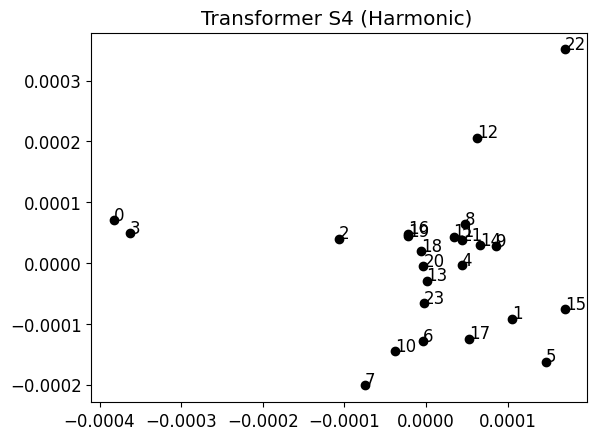

In [21]:
visualize_embedding(model.embedding.weight, "Transformer S4 (Harmonic) ")

## Load models and update visualizations

In [12]:
device='cpu'
data_size = 1000
train_ratio=0.8
seed=66
data_id = "permutation"
model_id = "H_MLP"

In [13]:
model = load_model_from_file(model_id, data_id, results_root = "results")

c:\Users\u admin\Desktop\Tegmark\grow_crystals\notebooks\..\src\utils\model.py:359: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f"../{resu

In [14]:
perms = list(itertools.permutations(range(4)))
perm_dict = dict(enumerate(perms))
perm_vals = ["".join(np.array(perm_dict[i]).astype(str)) for i in range(len(perm_dict))]
new_perm_dict = dict(zip(perm_dict.keys(), perm_vals))

Explained Variance Ratio [0.12444141 0.12277142]
Adjusting text


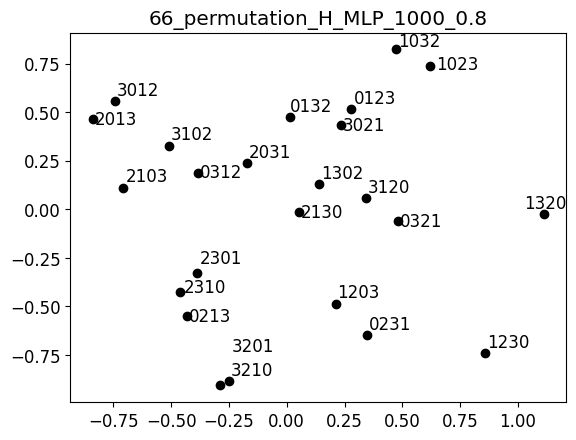

In [15]:
visualize_embedding(model.embedding.weight.cpu() if 'transformer' in model_id else model.embedding.cpu(), title=f"{seed}_{data_id}_{model_id}_{data_size}_{train_ratio}", dict_level = new_perm_dict, adjust_overlapping_text=True, color_dict=False)
# save_path=f"../results/emb_{seed}_{data_id}_{model_id}_{data_size}_{train_ratio}.png"

In [ ]:
# for riya_figs: visualize_embedding(model.embedding.weight.cpu() if 'transformer' in model_id else model.embedding.cpu(), save_path=f"../riya_figs/{model_id}.png", dict_level = new_perm_dict, adjust_overlapping_text=True, color_dict=False) 

In [14]:
np.linspace(0, 1000, 20, dtype=int)[4:]


array([ 210,  263,  315,  368,  421,  473,  526,  578,  631,  684,  736,
        789,  842,  894,  947, 1000])